## import

In [1]:
from fastai.vision.all import *
import timm

## Data

In [2]:
path = untar_data(URLs.PETS)
Path.BASE_PATH = path

In [3]:
path.ls()

(#2) [Path('images'),Path('annotations')]

In [4]:
images = Path(path/'images')

In [5]:
fname = images.ls()[5]
fname.name

'havanese_173.jpg'

In [6]:
re.findall('(.*)_\d+.jpg$',fname.name)

['havanese']

In [7]:
pets = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller('(.*)_\d+.jpg$'), 'name'),
    item_tfms=Resize(446),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)
dls = pets.dataloaders(images)

## Finding convnext models

In [8]:
timm.list_models('convnext*')

['convnext_atto',
 'convnext_atto_ols',
 'convnext_base',
 'convnext_femto',
 'convnext_femto_ols',
 'convnext_large',
 'convnext_large_mlp',
 'convnext_nano',
 'convnext_nano_ols',
 'convnext_pico',
 'convnext_pico_ols',
 'convnext_small',
 'convnext_tiny',
 'convnext_tiny_hnf',
 'convnext_xlarge',
 'convnext_xxlarge',
 'convnextv2_atto',
 'convnextv2_base',
 'convnextv2_femto',
 'convnextv2_huge',
 'convnextv2_large',
 'convnextv2_nano',
 'convnextv2_pico',
 'convnextv2_small',
 'convnextv2_tiny']

## Baseline convnext_tiny

In [9]:
if False:
    learn = vision_learner(dls, 'convnext_tiny', metrics=error_rate).to_fp16()
    learn.fine_tune(3)
    del learn

## Baseline ResNet34

In [10]:
if False:
    learn = vision_learner(dls, resnet34, metrics=error_rate).to_fp16()
    learn.fine_tune(3)
    del learn

convnext_tiny has better results, continue with convnext models

## Trying convnext_small

In [11]:
if False:
    learn = vision_learner(dls, 'convnext_small', metrics=error_rate).to_fp16()
    learn.fine_tune(3)
    del learn

Similar results as tiny model, continueing with the tiny model

## Learning rate finder

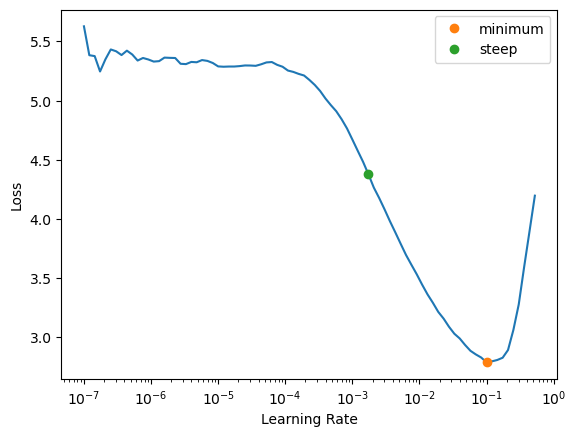

In [12]:
learn = vision_learner(dls, 'convnext_tiny', metrics=error_rate).to_fp16()
lr_min,lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))
del learn

In [13]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.00e-02, steepest point: 1.74e-03


## Different base lr

In [14]:
finding_lr = False

In [11]:
if True:
    learn = vision_learner(dls, 'convnext_tiny', metrics=error_rate).to_fp16()
    learn.fine_tune(3, base_lr=3e-3)
    del learn

epoch,train_loss,valid_loss,error_rate,time
0,0.896575,0.267764,0.075778,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.275091,0.271635,0.074425,00:24
1,0.195359,0.157464,0.051421,00:24
2,0.116421,0.138417,0.040595,00:25


In [16]:
if finding_lr:
    learn = vision_learner(dls, 'convnext_tiny', metrics=error_rate).to_fp16()
    learn.fine_tune(3, base_lr=4e-3)
    del learn

In [17]:
if finding_lr:
    learn = vision_learner(dls, 'convnext_tiny', metrics=error_rate).to_fp16()
    learn.fine_tune(3, base_lr=2e-3)
    del learn

In [31]:
if finding_lr:
    learn = vision_learner(dls, 'convnext_tiny', metrics=error_rate).to_fp16()
    learn.fine_tune(3, base_lr=5e-4)
    del learn

epoch,train_loss,valid_loss,error_rate,time
0,1.836911,0.298594,0.098106,00:20


epoch,train_loss,valid_loss,error_rate,time
0,0.392375,0.203497,0.064276,00:25
1,0.288756,0.173500,0.054804,00:24
2,0.228721,0.173622,0.053451,00:24


In [26]:
if finding_lr:
    learn = vision_learner(dls, 'convnext_tiny', metrics=error_rate).to_fp16()
    learn.fine_tune(3, base_lr=9e-4)
    del learn

epoch,train_loss,valid_loss,error_rate,time
0,1.409044,0.253102,0.077808,00:20


epoch,train_loss,valid_loss,error_rate,time
0,0.292732,0.191317,0.064953,00:24
1,0.223369,0.159794,0.048714,00:26
2,0.161978,0.150118,0.041272,00:24


## Unfreezing

epoch,train_loss,valid_loss,error_rate,time
0,0.839514,0.311086,0.091340,00:19
1,0.350373,0.187854,0.052097,00:20
2,0.199803,0.159751,0.051421,00:20


SuggestedLRs(valley=2.0892961401841603e-05)

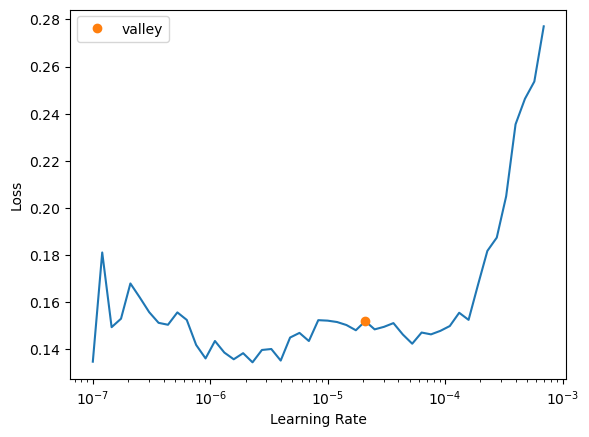

In [18]:
learn = vision_learner(dls, 'convnext_tiny', metrics=error_rate).to_fp16()
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.lr_find()

In [19]:
learn.fit_one_cycle(6, lr_max=7e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.218163,0.220272,0.063599,00:24
1,0.244689,0.365575,0.100135,00:28
2,0.182969,0.249851,0.071042,00:27
3,0.091735,0.162103,0.049391,00:24
4,0.055695,0.149104,0.039242,00:24
5,0.037641,0.147096,0.041272,00:25


In [16]:
del learn

In [17]:
torch.cuda.empty_cache()

## Discriminative Learning Rates

In [21]:
learn = vision_learner(dls, 'convnext_tiny', metrics=error_rate).to_fp16()
learn.fit_one_cycle(3, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.794400,0.284370,0.083897,00:20
1,0.349804,0.197670,0.059540,00:20


KeyboardInterrupt: 